# SMS Spam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ANLP-Y4T3/sms_spam.csv",encoding='ISO-8859-1')
data.head(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.iloc[:,:2]

In [ ]:
print(data)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data.columns = ['label', 'text']

In [ ]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
#checking distribution of the dataset
data.groupby('label').count()


,text
label,
ham,4825
spam,747


In [ ]:
# creating dummy variables for spam and ham
y=pd.get_dummies(data['label']) #check what get_dummies function does
y=y.iloc[:,0].values
data.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
print(y)

[ True  True False ...  True  True  True]


In [ ]:
print(data['label'].value_counts().index)

Index(['ham', 'spam'], dtype='object', name='label')


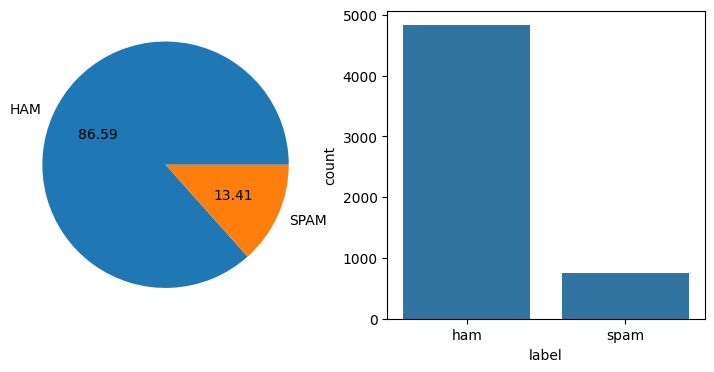

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualization of distribution of classes
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(data['label'].value_counts(),labels=['HAM','SPAM'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=data['label'].value_counts().index,y=data['label'].value_counts())#,data=data)
plt.show()


##Text Processing

In [ ]:
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
stopwords = nltk.corpus.stopwords.words('english')
import re

#cleaning dataset
tk = TweetTokenizer() #creating object for tokenizer
stemmer = SnowballStemmer('english') #creating object for stemmer
corpus = []

for i in range(0,len(data)): #len(data) indicates no. of rows or lines to process
 message = re.sub('[^a-zA-Z]', ' ', data['text'][i]) #replace any value other than a-z or A-Z with space
 message = re.sub("Subject", "", message)
 message = message.lower() #lowercase all words in a row
 message =tk.tokenize(message)
 message = [stemmer.stem(word) for word in message if not\
 word in set(stopwords)] #stemming if word not present in stop words
 message = ' '.join(message) #joining list of words to form a sentence
 corpus.append(message)

In [ ]:
print(len(corpus))

5572


In [ ]:
#creating cleaned dataframe containing text and labels for visualisation purpose
df = pd.DataFrame({'text':corpus})
print (df)

                                                   text
0     go jurong point crazi avail bugi n great world...
1                                 ok lar joke wif u oni
2     free entri wkli comp win fa cup final tkts st ...
3                   u dun say earli hor u c alreadi say
4                  nah think goe usf live around though
...                                                 ...
5567  nd time tri contact u u pound prize claim easi...
5568                              b go esplanad fr home
5569                                  piti mood suggest
5570  guy bitch act like interest buy someth els nex...
5571                                     rofl true name

[5572 rows x 1 columns]


In [ ]:
data= df.join(data["label"], how="outer")
print(data)

                                                   text label
0     go jurong point crazi avail bugi n great world...   ham
1                                 ok lar joke wif u oni   ham
2     free entri wkli comp win fa cup final tkts st ...  spam
3                   u dun say earli hor u c alreadi say   ham
4                  nah think goe usf live around though   ham
...                                                 ...   ...
5567  nd time tri contact u u pound prize claim easi...  spam
5568                              b go esplanad fr home   ham
5569                                  piti mood suggest   ham
5570  guy bitch act like interest buy someth els nex...   ham
5571                                     rofl true name   ham

[5572 rows x 2 columns]


##Data Visualization

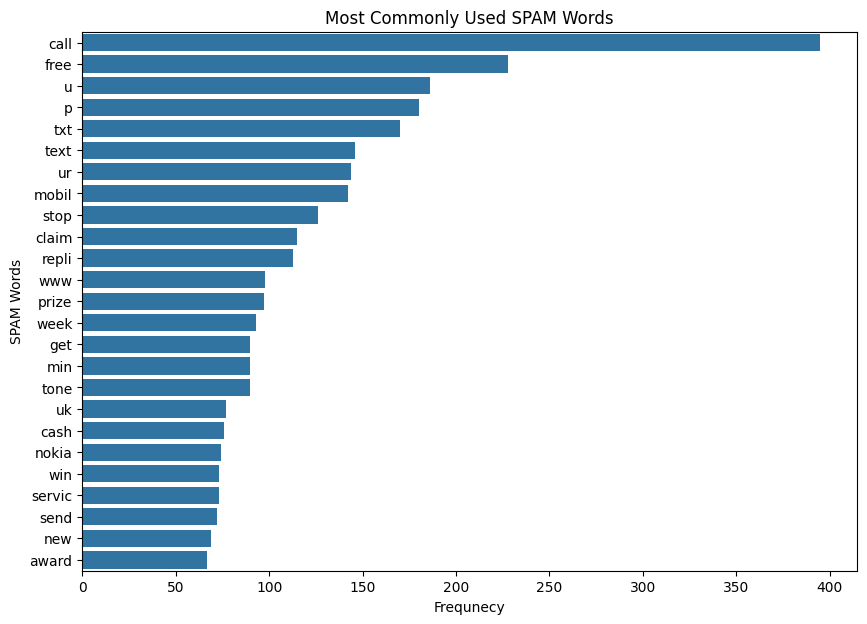

In [ ]:
#Distribution of most commonly used SPAM words
#create spam corpus which will holds all Spam words
from collections import Counter
spam_corpus = []
for msg in data[data['label'] == "spam"]['text'].tolist():
 for word in msg.split():
  spam_corpus.append(word)

#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used SPAM Words")
plt.xlabel("Frequnecy")
plt.ylabel("SPAM Words")
plt.show()

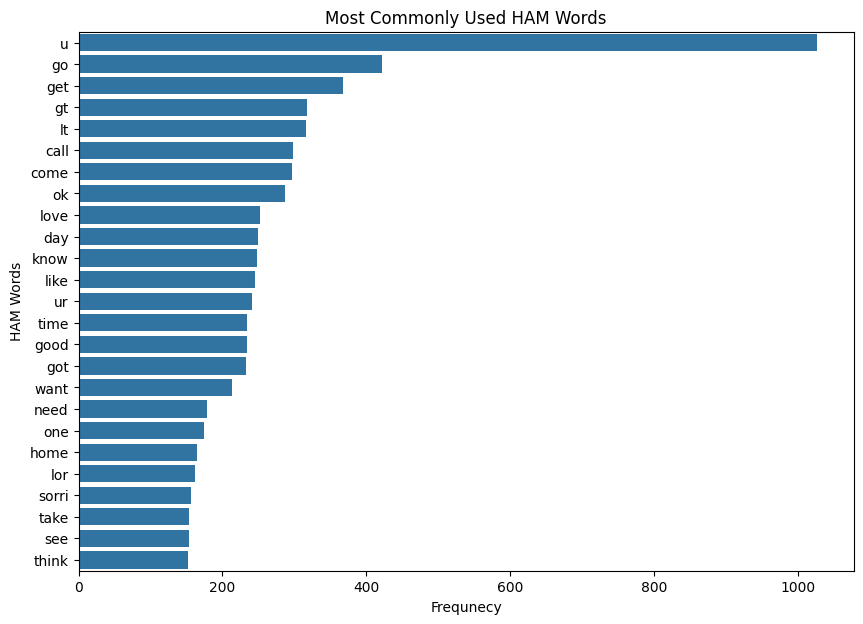

In [ ]:
#Distribution of most commonly used HAM words
#create spam corpus which will holds all ham words
ham_corpus = []
for msg in data[data['label'] == "ham"]['text'].tolist():
 for word in msg.split():
  ham_corpus.append(word)
#plot the figure
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used HAM Words")
plt.xlabel("Frequnecy")
plt.ylabel("HAM Words")
plt.show()

##Classification

In [ ]:
#Neural Networks
!pip install keras --quiet


In [ ]:
# Import the tools we will need from keras and sklearn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, Input
from sklearn.model_selection import train_test_split

In [ ]:
words=[]
for sent in corpus:
 sent_token =tk.tokenize(sent)
 words.append(sent_token)
X_train, X_test, y_train, y_test = train_test_split(words, y, test_size = 0.20, random_state = 0)

In [ ]:
print(len(words)) # prints out the number of message arrays (each containing the cleaned up words in the message)

5572


In [ ]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# transform the text messages to training and test vectors
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 100)
X_test_seq_padded = pad_sequences(X_test_seq, 100)

In [ ]:
X_train_seq_padded

array([[   0,    0,    0, ...,   33,  312, 2001],
       [   0,    0,    0, ...,  126, 2002,  159],
       [   0,    0,    0, ...,  453,    8,    6],
       ...,
       [   0,    0,    0, ..., 1457,  133,   32],
       [   0,    0,    0, ..., 1224,  977,   13],
       [   0,    0,    0, ...,  276,  349,  138]], dtype=int32)

In [ ]:
X_test_seq_padded

array([[   0,    0,    0, ...,    9,   45,  169],
       [   0,    0,    0, ...,    0, 2191,  462],
       [   0,    0,    0, ...,  949, 1694,   27],
       ...,
       [   0,    0,    0, ...,  351, 1089,   14],
       [   0,    0,    0, ...,   87,   17,   73],
       [   0,    0,    0, ...,  184,    4,  215]], dtype=int32)

In [ ]:
#create a simple 1 or 2 layer neural network with a given number of units in each layer
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [ ]:
# define the model
model = Sequential()
model.add(InputLayer(input_shape=(100,))) #changed shape to input_shape
model.add(Dense(2000, activation='sigmoid'))
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2000)              202000    
                                                                 
 dense_1 (Dense)             (None, 200)               400200    
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 602401 (2.30 MB)
Trainable params: 602401 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(X_train_seq_padded, y_train,
 epochs=40, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/40
112/112 [==============================] - 5s 24ms/step - loss: 0.3453 - accuracy: 0.8614 - val_loss: 0.2954 - val_accuracy: 0.8666
Epoch 2/40
112/112 [==============================] - 3s 24ms/step - loss: 0.2787 - accuracy: 0.8777 - val_loss: 0.3147 - val_accuracy: 0.8677
Epoch 3/40
112/112 [==============================] - 3s 25ms/step - loss: 0.2673 - accuracy: 0.8799 - val_loss: 0.2954 - val_accuracy: 0.8744
Epoch 4/40
112/112 [==============================] - 3s 31ms/step - loss: 0.2619 - accuracy: 0.8844 - val_loss: 0.2902 - val_accuracy: 0.8700
Epoch 5/40
112/112 [==============================] - 3s 30ms/step - loss: 0.2624 - accuracy: 0.8864 - val_loss: 0.2748 - val_accuracy: 0.8756
Epoch 6/40
112/112 [==============================] - 2s 14ms/step - loss: 0.2517 - accuracy: 0.8900 - val_loss: 0.2851 - val_accuracy: 0.8475
Epoch 7/40
112/112 [==============================] - 1s 13ms/step - loss: 0.2479 - accuracy: 0.8923 - val_loss: 0.3004 - val_accuracy: 0.8756

In [ ]:
# Test the modelon the test data after training
test_results = model.evaluate(X_test_seq_padded, y_test, verbose=1)
print(f'Test results - Accuracy: {test_results[1]*100: .2f}%')

35/35 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.8771
Test results - Accuracy:  87.71%


##multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train_seq_padded, y_train)

MultinomialNB()

In [ ]:
# Test the model after training
test_results = classifier.predict(X_test_seq_padded)
accuracy = metrics.accuracy_score(y_test, test_results)
print(f' {accuracy *100: 2f}%')

  80.627803%
